In [1]:
!pip install emcee
!pip install numdifftools
!pip install lmfit

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [2]:
from lmfit import Parameter, Parameters

# Create a set of Parameters to fit
params = Parameters()

# Create a slope and intercept with initial values 0
slope = Parameter(name="slope", value=0)
params["slope"] = slope
intercept = Parameter(name="intercept", value=0)
params["intercept"] = intercept

In [3]:
def linear_func(slope, intercept, x):
    # Calculate a point on a linear function
    return slope * x + intercept

In [4]:
import numpy as np

def linear(params, x, y):
    #A linear objective function
    
    # List of residuals
    residuals = []

    # Calculate the linear function at each point
    for i in range(len(x)):

        # Calculate the distance between the y values and the linear function (slope * x + intercept)
        residuals.append(y[i] - linear_func(params['slope'].value, params['intercept'].value, x[i]))
    return np.asarray(residuals)

In [5]:
from lmfit import minimize

# Input the data to be fit
test_x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
test_y = [0, 0.9, 2.2, 2.7, 4.4, 4.5, 6.6, 6.4, 8.8, 8.1]

# Perform a fitting
fitted_params = minimize(linear, params, args=(test_x, test_y))
fitted_params

In [7]:
import matplotlib.pyplot as plt

def plot_linear():
    # Make a plot for the linear model example
    
    plt.plot(test_x, test_y, 'o')
    plt.plot(test_x, [ linear_func(fitted_params.params['slope'].value, fitted_params.params['intercept'].value, i) for i in test_x ], label='model')
    plt.plot(test_x, abs(linear(fitted_params.params, test_x, test_y)), label='residuals')
    plt.legend()
    plt.show()

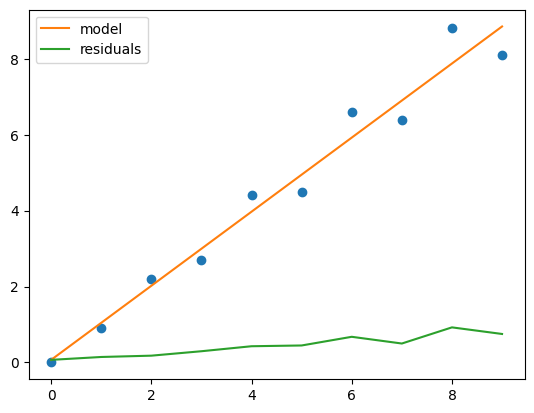

In [8]:
plot_linear()

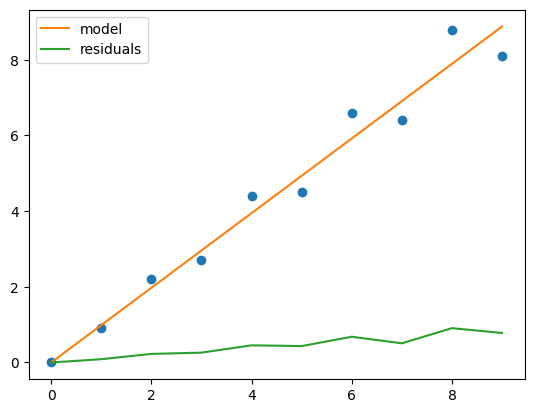

In [9]:
# Train while keeping intercept constant
params['intercept'].vary = False
fitted_params = minimize(linear, params, args=(test_x, test_y))
params['intercept'].vary = True
plot_linear()
fitted_params

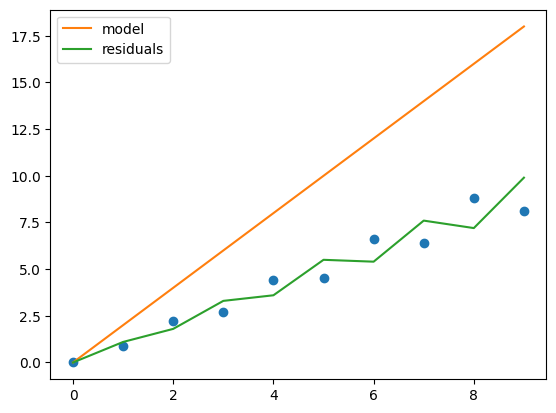

/usr/local/lib/python3.8/dist-packages/lmfit/printfuncs.py:393: RuntimeWarning: divide by zero encountered in scalar divide
  spercent = f'({abs(par.stderr/par.value):.2%})'


In [10]:
# Train while forcing the slope to be >=2
params['slope'].min = 2
fitted_params = minimize(linear, params, args=(test_x, test_y))
params['slope'].min = -np.inf
plot_linear()
fitted_params

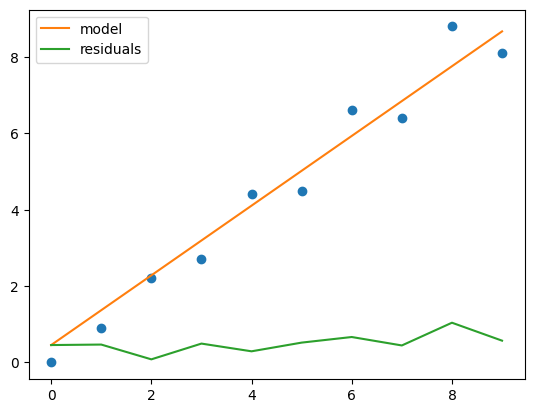

In [11]:
# Train while forcing the slope to equal twice the intercept
params['slope'].expr = "2 * intercept"
fitted_params = minimize(linear, params, args=(test_x, test_y))
params['slope'].expr = None
plot_linear()
fitted_params

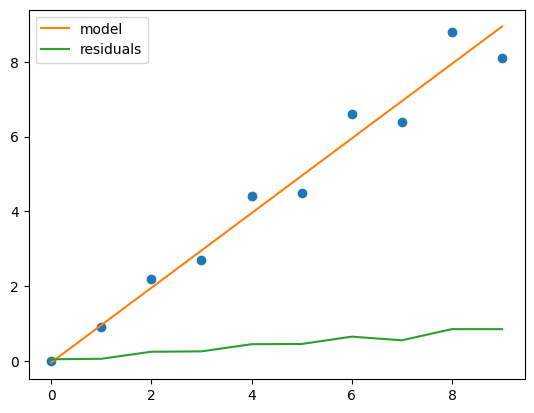

In [12]:
# Train while forcing the slope to equal the cosine of the intercept
params['slope'].expr = "cos(intercept)"
fitted_params = minimize(linear, params, args=(test_x, test_y))
params['slope'].expr = None
plot_linear()
fitted_params

In [13]:
def my_custom_function(in1, in2):
    #Calculate a meaningless value (in1^2 + in2) for use as a constraint

    return in1 * in1 + in2

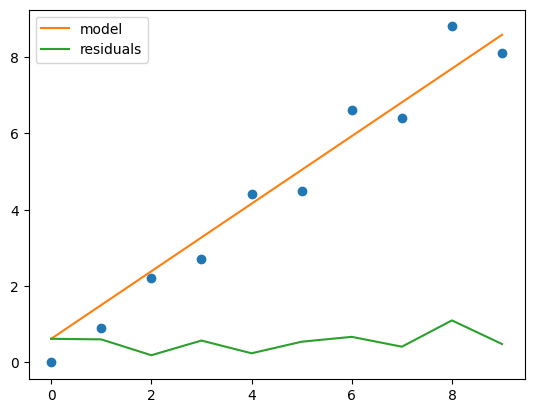

In [14]:
# Train after adding custom constrain code
params._asteval.symtable["my_custom_constraint"] = my_custom_function
params['slope'].expr = "my_custom_constraint(intercept, 0.5)"
fitted_params = minimize(linear, params, args=(test_x, test_y))
params['slope'].expr = None
plot_linear()
fitted_params

In [15]:
# Get some curve data
experiment_x = np.arange(-100, 98.8, 0.4)
experiment_y = [8.8071961778,12.4254974348,10.1572338013,13.4729286778,10.679495386,7.38745165797,9.65711857047,8.87909877763,13.32470203,11.605364074,5.92167755637,9.18850562274,9.91066363409,7.4179889283,9.03742484575,10.6323635693,9.96266886306,11.2526639116,7.97754256717,8.60904612078,10.1145761982,10.5657774949,8.92174343774,9.76998407897,12.5667400864,12.105245551,6.57831573784,5.91029308694,8.85515926516,12.8718304674,14.6873065286,7.67881680202,15.3977208003,15.3809209143,11.4191007666,9.79658197797,9.14252388847,8.77819987664,10.5159296894,9.05862822203,10.3902979973,16.1132135405,9.12611619302,16.5477833822,13.1179203215,10.3475311414,10.5968834262,15.3313573427,15.8371316897,9.17926424298,8.38180041351,10.4213858311,5.53143689082,10.0149315262,13.142502161,15.8257331237,11.6922672673,13.8848943919,10.2371240831,15.2011746266,9.25721570746,6.72698115706,13.0155839271,10.2358170149,15.3728356249,12.7742148274,10.7618328038,5.31595913205,14.7375308647,18.1314081029,11.4096101287,10.75191651,15.2176916471,13.0668033778,10.4427132721,9.71639778212,12.2551180509,11.1112849877,5.79370002221,14.4660035695,13.3009794034,7.16656255256,13.3878211256,16.606945335,9.31527904924,12.0227886964,13.4638058127,8.80538906096,2.96177681457,13.8826283025,11.1275958495,11.7538589365,13.0501566287,8.09460475647,12.121424681,12.7506893776,14.9896317166,16.8279597345,11.2206710699,11.6229165516,12.1812085738,11.1691205298,21.8818460552,17.2018144959,16.5999104903,18.706982468,19.4607606668,12.8698873112,15.5471003362,13.1950610034,17.546930665,14.8208373412,12.0461654976,15.4138585628,14.2555732668,17.6027535685,14.4774625225,11.671045365,15.5116436612,15.1494587076,20.3145542137,15.5507484322,16.7567727915,17.2600602439,11.5658977765,18.6270081668,17.1308807735,14.86773701,17.2368274429,14.3459736302,12.3841166892,15.530021754,14.9473119825,8.05185756777,22.7396634114,16.5517947267,20.4373557511,18.1044937418,17.963075529,14.5266888002,22.5130151257,15.9316100575,23.5858127256,19.1252095017,19.7130684661,24.9839286998,21.3613965747,22.3294344271,21.3263418653,26.1254183643,17.8872708214,20.7831342,33.9746577402,19.4034180405,23.9722373629,22.4764655308,27.8984071291,22.3099225611,23.9845324182,19.0288025876,17.9026716324,22.8721416302,22.8902517523,26.3931068238,28.5091816493,20.129954491,22.6771170483,28.4038313237,35.4585765125,25.1765027132,26.5989152036,13.7134279708,32.6771955056,33.6019338842,31.5507302407,35.3622036898,23.3122267726,35.2239222172,24.8568212273,22.1287179788,40.3260755258,29.8147796845,36.1426796642,39.0166037651,45.1399490183,34.5806472125,36.9103154367,35.7605388683,33.1654208344,39.9603753918,42.0228271223,43.9640159081,32.6804146556,47.4473492788,48.4027665019,38.5880457498,48.7137143172,54.0146566813,55.9430480122,51.8933365206,45.8036383643,56.701335359,53.5901160253,60.0000538536,47.7153801683,57.8247154612,74.0926099983,61.7055083705,81.0954889039,72.9883822074,73.9787292221,75.6897355636,83.1800700872,82.3607644869,92.1160287749,90.990902547,82.9952474395,98.286434053,101.486257058,118.891547134,109.628779351,138.765214227,133.590630706,134.531712853,151.761028767,174.077728796,184.88066684,185.818593819,230.629266822,238.33281087,270.388154128,302.245397277,331.981460331,354.133544946,455.024530713,532.503040691,559.123088156,697.614716519,818.226594035,1004.40160343,1210.98819146,1452.74937186,1759.0869398,1958.81320216,2431.2570322,2658.63356188,2676.28022446,2508.51460801,2386.78588724,1988.1445586,1560.43802159,1168.02611568,806.199781935,659.535542694,550.955793058,424.438022714,358.867538072,310.002948954,268.300784982,220.631379025,205.2763777,215.379802869,190.699639619,173.426538037,157.955021474,167.64044632,119.908316706,136.151203589,116.961124766,110.902377009,120.869752162,115.176076856,101.960551559,95.5962196584,88.3006884439,66.2339889627,88.2709324292,70.0392378157,60.7175496155,81.0341442456,63.4540658682,66.8054540209,75.4813057473,71.1860320584,48.5668616147,54.1756749097,51.5117821901,50.4290019782,50.9670729225,60.1769668852,53.2087374838,50.4932884282,42.8937451714,55.6292024879,36.922203416,47.4407170123,41.4676916843,34.1115041622,32.5800358941,37.3697339622,38.9488865281,37.5473770552,52.1022999788,32.8371188147,32.2087410969,29.920752771,26.9740877145,35.9994279784,30.4159768896,38.2047285167,22.3466071397,36.2851717251,30.5609095563,26.1555713617,32.2301428815,28.2550612784,17.4660239015,22.0531274725,23.0434398683,26.0489858783,32.9374112968,31.5607618255,20.0038964325,29.7787063465,27.8251578659,23.2673103806,23.5981022737,24.2578490137,20.607055092,21.9416950512,23.5203437271,24.6052491677,18.3178717107,19.8857850989,16.247105514,25.3077859588,19.5792005494,15.9569410723,29.8713036026,13.2037129643,22.674725529,26.0714596278,19.3622753148,27.4011083925,20.5256100011,17.2662905924,21.670076844,17.2033092085,15.2336217943,20.0851582487,13.3477768117,14.7604315257,16.2490303059,20.4777260053,15.0278302681,18.8790505813,14.3092314265,10.3110450093,21.0658890341,24.0789830363,14.4085828854,15.4578590995,20.1190639489,21.0347395338,14.769812063,17.1322351603,14.8470109918,15.7192778584,15.4792646071,14.6526715216,11.8279919876,19.3969245208,12.8183830361,12.6625719583,5.89833184438,12.9323609157,13.7883985909,15.5950612863,15.9867409631,12.8101762958,14.3143718918,13.4371557721,13.8228519594,8.78888854048,18.4805761079,13.4601429844,15.53227569,8.74883323105,20.8382212315,10.0642110792,13.6463527861,11.2054861168,10.7811643588,13.8959890922,11.2974197045,16.5459653539,6.16414398926,12.1377131306,13.5245921343,14.8581169589,20.5273135013,5.00282577075,19.608541984,10.4422042673,11.8562331639,14.9227181905,9.55927306676,25.9731905878,12.1395241681,12.587036575,16.6063525798,14.9873193565,12.8636813284,9.43485513037,7.99629202943,11.2340930155,7.84196005193,12.1135374607,10.5347745178,8.89099798123,12.7818599447,3.49304884268,17.9511433457,8.81800448266,16.3159193281,5.62334802079,12.1816263117,16.6546157673,14.5814211908,8.76520435577,8.71904202391,11.4579614659,8.31818628216,9.17756134773,8.79684035237,11.0708772986,12.6879429628,18.2762208694,10.5056454523,6.56793998081,6.37405587301,10.1814795963,6.33417206736,11.9012256985,12.6129997873,12.2176207759,8.12877845339,6.83824730205,13.3579772239,10.5831271757,11.3640876245,14.6583724519,5.26060862403,2.10045584131,3.09285258399,10.4292736878,6.10491727172,4.94643421727,12.6188956127,5.31194879196,6.85886289492,12.6238111328,6.27846844967,7.74735380064,10.3728793849,8.98583037757,10.5200914531,8.48432253447,8.6930247015,10.5168419016,9.57475256751,11.3320763714,9.91316610012,4.43864759879,8.2402613806,9.11016169749,7.50524859893,15.7976541233,5.95909033414,5.68178730216,12.6583768241,8.76121006902,10.9014189283,11.3089188178,14.793016751,8.56530987827,6.78537637244,3.85074694388,11.827399988,9.04640158933,7.60228894878,9.10622131617,9.840349782,9.7786261821,7.1649595412,6.12171897892,5.25553827723]

In [16]:
def lorentzian(amplitude, center, width, x):
    #Calculate the Lorentzian value at a single point
    return (amplitude/np.pi)*((width)/((x-center)**2+(width)**2))

In [17]:
def full_model(params, x, y):
    #An objective function for a gaussian model
    
    # List of residuals
    residuals = []

    # Calculate the linear function at each point
    for i in range(len(x)):

        # Calculate the linear background
        background = linear_func(params['slope'].value, params['intercept'].value, x[i])

        # Calculate the Lorentzian
        lorentz = lorentzian(params['amplitude'], params['center'], params['width'], x[i])

        # Calculate the residual between the observation and the model (Lorentzian + background)
        residuals.append(y[i] - background - lorentz)
    return np.asarray(residuals)

In [18]:
def plot_model():
    # Make a plot for the gaussian model example

    background_line =  [ linear_func(fitted_params.params['slope'].value, fitted_params.params['intercept'].value, i) for i in experiment_x ]
    lorentzian_line =  [ lorentzian(fitted_params.params['amplitude'].value, fitted_params.params['center'].value, fitted_params.params['width'].value, i) for i in experiment_x ]
    model_line = []
    for i in range(len(background_line)):
        model_line.append(background_line[i] + lorentzian_line[i])
        
    plt.plot(experiment_x, experiment_y, 'o')
    plt.plot(experiment_x, background_line, label='background')
    plt.plot(experiment_x, lorentzian_line, label='lorentzian')
    plt.plot(experiment_x, model_line, label='model')
    plt.plot(experiment_x, abs(full_model(fitted_params.params, experiment_x, experiment_y)), label='residuals')
    plt.legend()
    plt.show()

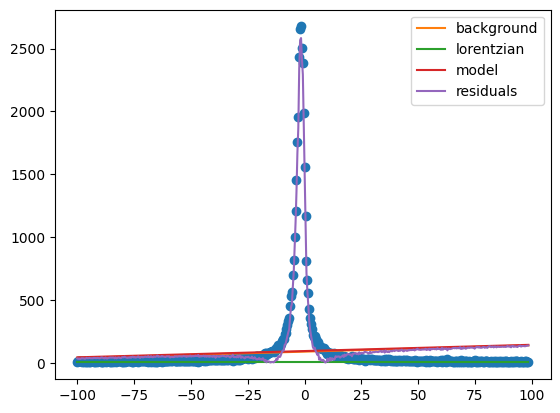

In [19]:
# Create parameters for the model
params['amplitude'] = Parameter(name="amplitude", value=0)
params['amplitude'].min = 0.1
params['center'] = Parameter(name="center", value=0)
params['width'] = Parameter(name="width", value=0)
params['width'].min = 0.1

fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y))
plot_model()
fitted_params

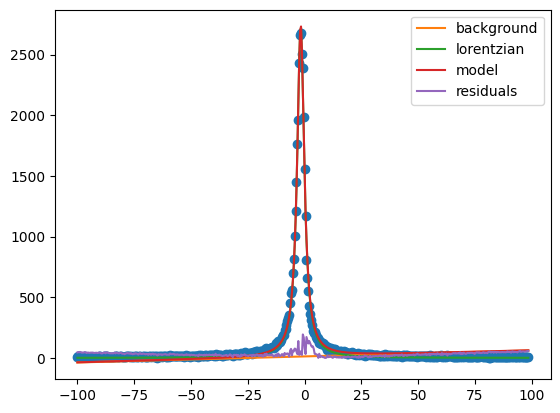

In [20]:
# Choose some better starting values for our search
params['amplitude'].value = 1
params['width'].value = 1

fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y))
plot_model()
fitted_params

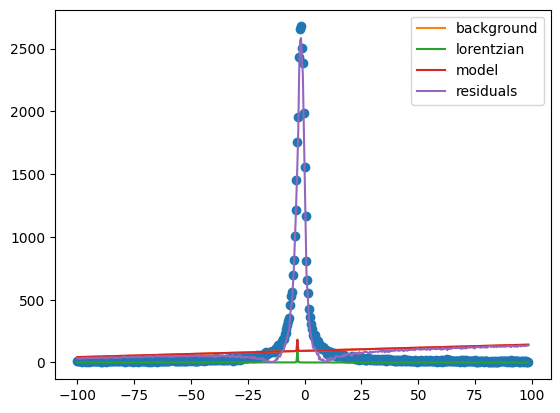

In [21]:
#Fit with the least squares using trust regions reflective method
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y), method="least_squares")
plot_model()
fitted_params

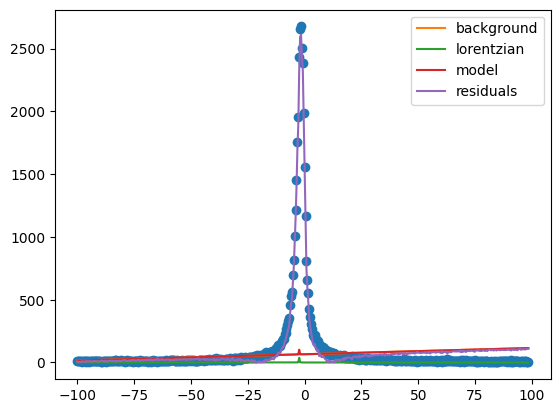

In [22]:
#Fit with the constrained optimization by linear approximation method
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y), method="cobyla")
plot_model()
fitted_params

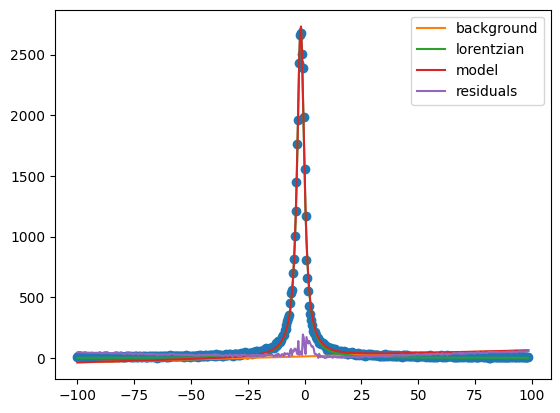

In [23]:
#Fit with the basin hopping method
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y), method="basinhopping")
plot_model()
fitted_params

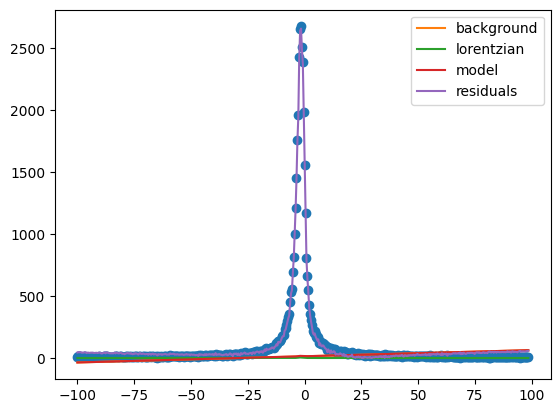

In [24]:
#Brute force requires ranges to construct its grid
params['slope'].brute_step = 1
params['slope'].min = 0
params['slope'].max = 1
params['intercept'].brute_step = 1
params['intercept'].min = 1
params['intercept'].max = 15
params['amplitude'].brute_step = 1
params['amplitude'].min = 1
params['amplitude'].max = 15
params['center'].brute_step = 1
params['center'].min = -5
params['center'].max = 5
params['width'].brute_step = 1
params['width'].min = 1
params['width'].max = 15

# Fit with brute force
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y), method="brute")
plot_model()
fitted_params

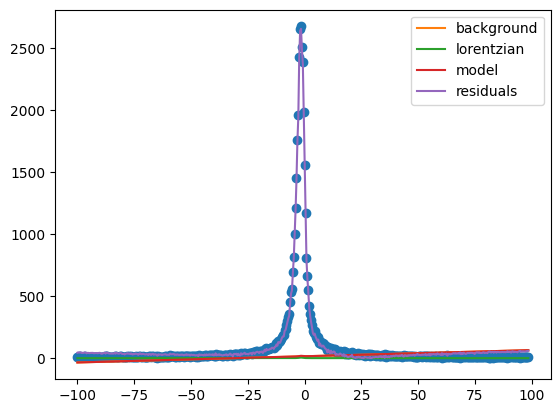

In [25]:
#Fit with the dual annealing method
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y), method="dual_annealing")

#Reset all the boundaries we established
params['slope'].min = -np.inf
params['slope'].max = np.inf
params['intercept'].min = -np.inf
params['intercept'].max = np.inf
params['amplitude'].min = 0.001
params['amplitude'].max = np.inf
params['center'].min = -np.inf
params['center'].max = np.inf
params['width'].min = 0.001
params['width'].max = np.inf

plot_model()
fitted_params

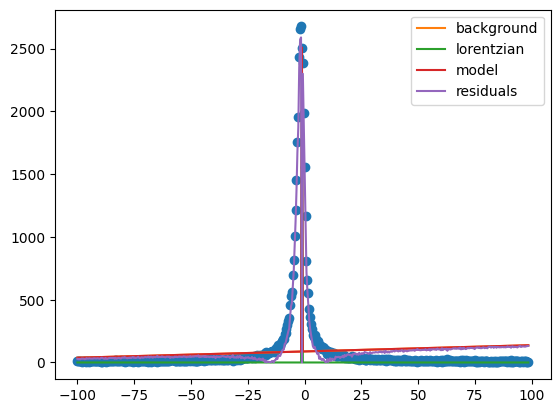

In [26]:
#Fit with the conjugate gradient method
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y), method="cg")
plot_model()
fitted_params

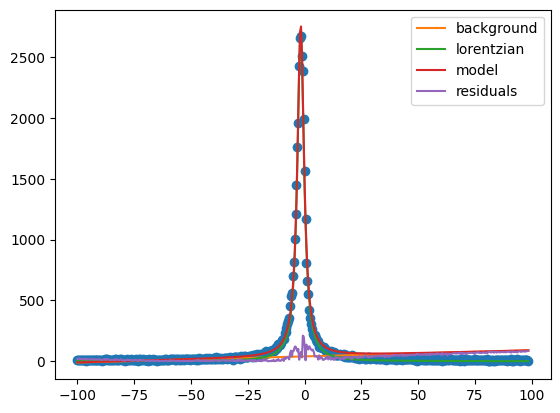

In [27]:
#Fit with the Nelder-Mead method
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y), method="nelder-mead")
plot_model()
fitted_params

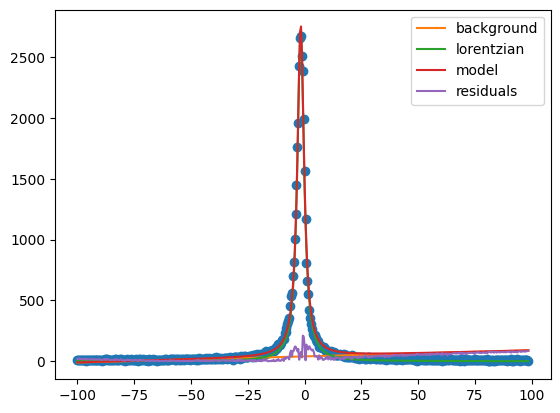

In [28]:
#Fit with the Newton method
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y), method="newtoncg")
plot_model()
fitted_params

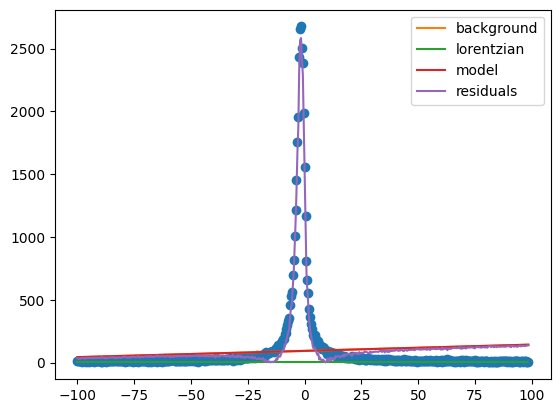

In [29]:
#Fit with the Simplified Homology Global Optimization method
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y), method="shgo", calc_covar=True)
plot_model()
fitted_params

In [30]:
# Check whether the model could calculate errors
fitted_params.errorbars

False

In [31]:
# Fit with Levenberg-marquadt
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y))

# This will have calculated errors
print(fitted_params.errorbars)

fitted_params.uvars

True


{'slope': 0.5+/-0,
 'intercept': 12.428475479843184+/-1.8250709825068312,
 'amplitude': 16181.136703540295+/-125.13923586939514,
 'center': -1.7496251161601777+/-0.013704450619147539,
 'width': 1.8818863031003081+/-0.019976315797641083}

In [38]:
from lmfit import Minimizer

# Use Markov Chain Monte Carlo to estimate errors
minimizer = Minimizer(full_model, fitted_params.params, fcn_args=(experiment_x, experiment_y))
Minimizer.emcee(minimizer, steps=500)

You must install the tqdm library to use progress indicators with emcee


emcee: Exception while calling your likelihood function:
  params: [ 1.24245166e+01  1.61819665e+04 -1.74998455e+00  1.88192770e+00]
  args: (<function full_model at 0x7f686b80f700>, Parameters([('slope', <Parameter 'slope', value=0.5 (fixed), bounds=[-inf:inf], brute_step=1>), ('intercept', <Parameter 'intercept', value=12.424516623032785, bounds=[-inf:inf], brute_step=1>), ('amplitude', <Parameter 'amplitude', value=16181.96650825537, bounds=[0.001:inf], brute_step=1>), ('center', <Parameter 'center', value=-1.7499845455494825, bounds=[-inf:inf], brute_step=1>), ('width', <Parameter 'width', value=1.8819277042687705, bounds=[0.001:inf], brute_step=1>)]), ['intercept', 'amplitude', 'center', 'width'], array([[ -inf,   inf],
       [0.001,   inf],
       [ -inf,   inf],
       [0.001,   inf]]))
  kwargs: {'is_weighted': True, 'float_behavior': 'posterior', 'userargs': (array([-1.00000000e+02, -9.96000000e+01, -9.92000000e+01, -9.88000000e+01,
       -9.84000000e+01, -9.80000000e+01, -9

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/usr/local/lib/python3.8/dist-packages/lmfit/minimizer.py", line 1069, in _lnprob
    out = userfcn(params, *userargs, **userkwargs)
  File "/tmp/ipykernel_12456/3330586462.py", line 11, in full_model
    background = linear_func(params['slope'].value, params['intercept'].value, x[i])
  File "/tmp/ipykernel_12456/3651654350.py", line 3, in linear_func
    return slope * x + intercept
KeyboardInterrupt


KeyboardInterrupt: 

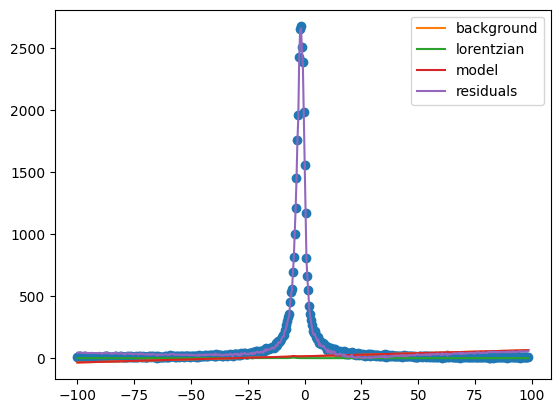

In [157]:
#Differential evolution requires finite ranges
params['slope'].brute_step = 1
params['slope'].min = 0
params['slope'].max = 1
params['intercept'].brute_step = 1
params['intercept'].min = 1
params['intercept'].max = 15
params['amplitude'].brute_step = 1
params['amplitude'].min = 1
params['amplitude'].max = 15
params['center'].brute_step = 1
params['center'].min = -5
params['center'].max = 5
params['width'].brute_step = 1
params['width'].min = 1
params['width'].max = 15

#Fit with a genetic algorithm
fitted_params = minimize(full_model, params, args=(experiment_x, experiment_y), method="differential_evolution")
plot_model()
fitted_params

In [40]:
!pip install agentpy

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [41]:
import agentpy
import IPython

In [197]:
class Genome():
    '''
    One genome for a member of the Boid population
    '''

    def __init__(self):

        #Randomly set genes

        # Strength of prefernce to travel in the same direction as neighbors
        self.alignment_preference = 2 * np.random.rand() -1

        # Strength of preference for staying near neighbors
        self.cohesion_preference = 2 * np.random.rand() -1

        # Maximum radius at which neighbors can be detected
        self.neighbor_detection_radius = np.random.randint(10,30)

        # Strength of preference for staying away from neighbors
        self.seperation_preference = 2 * np.random.rand() -1

        # Fitness starts at 0
        self.fitness = 0

        # Factor for improving alignment, even though it will otherwise not contribute
        self.alignment_bonus = 0

        # Factor for the fitness penalty from being too close to other Boids
        self.collision_penalty = 1

        # Factor for the fitness penalty from changing direction too quickly
        self.turn_penalty = 0

        # Velocity on last time steps
        self.last_velocities = []

    def mutate_alignment(self):
        # Add [-0.25, 0.25] to alignment, within [-1, 1]

        new_value = self.alignment_preference + (np.random.rand() * 0.5 - 0.25)

        while new_value < -1 or new_value > 1:
            new_value = self.alignment_preference + (np.random.rand() * 0.5 - 0.25)

        self.alignment_preference = new_value

    def mutate_cohesion(self):
        # Add [-0.25, 0.25] to cohesion, within [-1, 1]

        new_value = self.cohesion_preference + (np.random.rand() * 0.5 - 0.25)

        while new_value < -1 or new_value > 1:
            new_value = self.cohesion_preference + (np.random.rand() * 0.5 - 0.25)

        self.cohesion_preference = new_value

    def mutate_detection(self):
        # Add [5, 5] to detection radius, within [10, 30]

        new_value = self.neighbor_detection_radius + (np.random.randint(-5, 5))

        while new_value < 10 or new_value > 30:
            new_value = self.neighbor_detection_radius + (np.random.randint(-5, 5))

        self.neighbor_detection_radius = new_value

    def mutate_seperation(self):
        # Add [-0.25, 0.25] to alignment, within [-1, 1]

        new_value = self.seperation_preference + (np.random.rand() * 0.5 - 0.25)

        while new_value < -1 or new_value > 1:
            new_value = self.seperation_preference + (np.random.rand() * 0.5 - 0.25)

        self.seperation_preference = new_value

    def update_fitness(self, num_neighbors, num_collisions, velocity):
        '''
        Update the genome's observed fitness for a single timestep.
        '''

        if len(self.last_velocities) > 0:
            for i, v in enumerate(self.last_velocities):
                if i == 0:
                    velocity_delta = velocity - self.last_velocities[0]
                    velocity_delta[0] = abs(velocity_delta[0])
                    velocity_delta[1] = abs(velocity_delta[1])
                elif i != 4:
                    delta = self.last_velocities[i - 1] - self.last_velocities[i]
                    delta[0] = abs(delta[0])
                    delta[1] = abs(delta[1])
                    velocity_delta = velocity_delta + delta

            if len(self.last_velocities) == 5:
                self.last_velocities.pop()
                self.last_velocities.prepend(velocity)
        else:
            velocity_delta = [0, 0]
        self.last_velocity = velocity
        self.fitness = self.fitness + num_neighbors - (self.collision_penalty * num_collisions) - (self.turn_penalty * (velocity_delta[0] + velocity_delta[1])) + \
            (self.alignment_bonus * self.alignment_preference)

In [120]:
class Boid(agentpy.Agent):
    ''' 
    Agentpy Agent for a Boid
    '''

    def __init__(self, space, genome):
        super().__init__(space)
        self.space = space
        self.genome = genome

        # Read parameters from the genome
        self.alignment_preference = genome.alignment_preference
        self.cohesion_preference = genome.cohesion_preference
        self.neighbor_detection_radius = genome.neighbor_detection_radius
        self.seperation_preference = genome.seperation_preference

    def setup(self):

        # Start with a random velocity, magnitude 1
        self.velocity = np.random.rand(2)
        self.velocity = self.velocity/np.linalg.norm(self.velocity)

    def setup_pos(self, space):

        self.space = space
        self.neighbors = space.neighbors
        self.pos = space.positions[self]

    def step(self):

        # Get the neighbors the Boid can detect
        neighbors = self.space.neighbors(self, distance=self.neighbor_detection_radius)

        # Calculate a new velocity only if nearby neighbors
        if neighbors:

            new_velocity = np.zeros(2)

            # Angle towards the center of all neighbor's positions
            center = np.sum(np.array(neighbors.pos), 0) / len(neighbors)
            new_velocity = (center - self.pos) * self.cohesion_preference

            # Angle away from the center of neighbors who are too close
            seperation_direction = np.zeros(2)
            for close_neighbor in self.space.neighbors(self, distance=3):
                seperation_direction = seperation_direction - close_neighbor.pos + self.pos
            new_velocity = new_velocity + (seperation_direction * self.seperation_preference)

            # Angle towards the average direction of neighbors
            average_direction = np.sum(np.array(neighbors.velocity), 0) / len(neighbors)
            new_velocity = new_velocity + ((average_direction + self.velocity) * self.alignment_preference)

            # Set velocity to unit vector
            self.velocity = new_velocity/np.linalg.norm(new_velocity)

        # Move the Boid
        self.space.move_by(self, self.velocity)
        self.pos = self.space.positions[self]

        # Boids bounce off the walls and go backwards if they try to go beyond the simulation boundaries
        if self.pos[0] == 0 or self.pos[0] == 50 or self.pos[1] == 0 or self.pos[1] == 50:
            self.velocity = self.velocity * -1
            self.space.move_by(self, self.velocity * 2)

        # Record the genome's fitness for this timestep
        self.genome.update_fitness(len(self.space.neighbors(self, distance=9)), len(self.space.neighbors(self, distance=3)), self.velocity)


In [44]:
class BoidsModel(agentpy.Model):
    '''
    Model to run multiple Boids
    '''

    def __init__(self, parameters, generation):
        super().__init__(parameters)
        self.generation = generation

    def setup(self):

        # Create a Boid agent for each genome in the generation
        self.agents = agentpy.AgentList(self, 0, Boid)
        for genome in self.generation:
            self.agents.append(Boid(self, genome))
        
        self.space = agentpy.Space(self, shape=[50, 50] )
        self.space.add_agents(self.agents, random=True)
        self.agents.setup_pos(self.space)

    def step(self):

        # Delegate to each agent's step()
        self.agents.step()

In [164]:
def draw_frame(model, ax):
    '''
    Draw one frame of boids
    '''

    # Set up plot
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)
    ax.set_axis_off()

    # Draw boids
    boids = np.array(list(model.space.positions.values())).T
    ax.scatter(*boids, s=1)

In [48]:
def create_plot(model):
    '''
    Create an animated plot of the Boids model
    '''
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection=None)
    display = agentpy.animate(model, fig, ax, draw_frame)
    return IPython.display.HTML(display.to_jshtml(fps=30))

In [98]:
# Create a purely random initial generation
generation = []

for i in range(200):
    generation.append(Genome())

# Run for 100 timesteps
model = BoidsModel({"steps": 100}, generation)
create_plot(model)

In [198]:
def roulette_wheel_selection(generation):
    '''
    Select 2n parents from a size n generation via roulette wheel selection
    '''

    # Guard against negative fitness values
    min_fitness = 1

    for genome in generation:
        if genome.fitness < min_fitness:
            min_fitness = genome.fitness

    if min_fitness < 1:
        for genome in generation:
            genome.fitness = genome.fitness + (-1 * min_fitness) + 1
    
    # Count the total fitness
    total = 0

    for genome in generation:
        total += genome.fitness

    selected = []

    # Pick a random number for each parent and count up the total fitnesses until reaching it
    for i in range(2 * len(generation)):
        num = np.random.randint(0, total - 1)

        for genome in generation:
            if num > genome.fitness:
                num -= genome.fitness
            else:
                selected.append(genome)
                break

    return selected
            

In [199]:
def one_point_crossover(generation, select):
    '''
    Perform one point crossover on a generation of genomes.
    '''

    parents = select(generation)
    
    children = []

    for i in range(len(generation)):

        child = Genome()

        # There are 4 genes, so not accepting perfect copies, only 3 possible crossover points.
        crossover_point = 1 + np.random.randint(0, 2) 

        child.alignment_preference = parents[2 * i].alignment_preference

        if crossover_point >= 2:
            child.cohesion_preference = parents[2 * i].cohesion_preference
        else:
            child.cohesion_preference = parents[2 * i + 1].cohesion_preference

        if crossover_point >= 3:
            child.neighbor_detection_radius = parents[2 * i].neighbor_detection_radius
        else:
            child.neighbor_detection_radius = parents[2 * i + 1].neighbor_detection_radius

        child.seperation_preference = parents[2 * i + 1].seperation_preference

        children.append(child)

    return children
            

In [109]:
def create_new_generation(old_generation, select, crossover, mutation_rate):
    '''
    Perform selection, crossover, and mutation
    '''

    # New generation from selection/crossover
    generation = crossover(old_generation, roulette_wheel_selection)

    # Check each member of the population for mutation
    for genome in generation:
    
        if np.random.rand() <= mutation_rate:

            # Randomly select gene to mutate
            gene = np.random.rand()
            
            if gene < 0.25:
                genome.mutate_alignment()
            elif gene < 0.5:
                genome.mutate_cohesion()
            elif gene < 0.75:
                genome.mutate_detection()
            else:
                genome.mutate_seperation()

    return generation



In [99]:
# Run three more generations
for i in range(3):
    generation = create_new_generation(generation, roulette_wheel_selection, one_point_crossover, 0.15)

    model = BoidsModel({"steps": 100}, generation)
    model.run()

# Run the final generation and produce outputs
generation = create_new_generation(generation, roulette_wheel_selection, one_point_crossover, 0.15)
model = BoidsModel({"steps": 100}, generation)
create_plot(model)

400
0.5130559209223735
0.894030633351545
0.7927204631096308
0.22056415618461134
0.25894256301931096
0.5224506223530269
0.14929181242238632
0.3494120115853554
0.9472259590950668
0.9772676751263544
0.49661715571205256
0.6060244132479177
0.41265699743244144
0.7517515856517841
0.9992820186119714
0.9811751689462345
1.0728119069150728
0.49594093702631936
0.019951188014377563
0.5786051013291992
0.3709958296189365
0.1365776574199321
0.6169995279229537
0.9783322216045888
0.010133799399590249
0.3982385669327292
0.9041484028008437
0.639375044947835
0.19104047340054064
0.801081815859514
0.46184919092685006
0.9294172263547634
0.715645731954142
0.6484621479251341
0.6648431050211085
0.6102898804745959
0.7995142447570746
Completed: 100 steps
Run time: 0:00:16.903654
Simulation finished
400
0.41575942680713873
0.5911774868533543
0.6905744450010572
0.9540643877529329
0.9160425372943409
0.5138820322596759
0.7570790563828272
0.01927586604792031
0.07568423998853313
0.6594545889107807
0.3539405736330682
0.5

In [154]:
def genetic_algorithm(num_generations, initial_generation, select, crossover, mutation_rate):
    '''
    Perform a full genetic algorithm run 
    '''
    
    model = BoidsModel({"steps": 100}, initial_generation)
    model.run()

    generation = initial_generation
    
    for i in range(num_generations - 2):
        generation = create_new_generation(generation, select, crossover, mutation_rate)
    
        model = BoidsModel({"steps": 100}, generation)
        model.run()
    
    generation = create_new_generation(generation, select, crossover, mutation_rate)
    return BoidsModel({"steps": 100}, generation)

In [155]:
# Start over, penalzing collisions more
generation = []

for i in range(200):
    genome = Genome()
    genome.collision_penalty = 5
    generation.append(genome)

create_plot(genetic_algorithm(5, generation, roulette_wheel_selection, one_point_crossover, 0.15))

Completed: 100 steps
Run time: 0:00:10.506902
Simulation finished
Completed: 100 steps
Run time: 0:00:15.252998
Simulation finished
Completed: 100 steps
Run time: 0:00:14.778753
Simulation finished
Completed: 100 steps
Run time: 0:00:15.434002
Simulation finished


In [163]:
# Start over, penalzing collisions even further
generation = []

for i in range(200):
    genome = Genome()
    genome.collision_penalty = 100
    generation.append(genome)

model = genetic_algorithm(5, generation, roulette_wheel_selection, one_point_crossover, 0.15)
create_plot(model)

Completed: 100 steps
Run time: 0:00:12.650105
Simulation finished
Completed: 100 steps
Run time: 0:00:08.171003
Simulation finished
Completed: 100 steps
Run time: 0:00:11.180712
Simulation finished
Completed: 100 steps
Run time: 0:00:14.105081
Simulation finished


In [159]:
# Start over, penalzing sharp turns
generation = []

for i in range(200):
    genome = Genome()
    genome.collision_penalty = 5
    genome.turn_penalty = 25
    generation.append(genome)

create_plot(genetic_algorithm(5, generation, roulette_wheel_selection, one_point_crossover, 0.15))

Completed: 100 steps
Run time: 0:00:09.520521
Simulation finished
Completed: 100 steps
Run time: 0:00:12.126954
Simulation finished
Completed: 100 steps
Run time: 0:00:09.348232
Simulation finished
Completed: 100 steps
Run time: 0:00:11.182424
Simulation finished


In [182]:
from statistics import fmean

def averages(generation):
    
    # Print the means of the population's features
    print("Alignment:")
    print(fmean([ g.alignment_preference for g in generation]))
    print("Cohesion:")
    print(fmean([ g.cohesion_preference for g in generation]))
    print("Detection:")
    print(fmean([ g.neighbor_detection_radius for g in generation]))
    print("Seperation:")
    print(fmean([ g.seperation_preference for g in generation]))
    print("fitness")
    print(fmean([ g.fitness for g in generation]))

In [176]:
averages(model.generation)

Alignment:
-0.036791824521015114
Cohesion:
0.6167299238082702
Detection:
20.368977176876044
Seperation:
0.22288789562392836


In [179]:
# Start over, providing bonus fitness for having high alignment
generation = []

for i in range(200):
    genome = Genome()
    genome.alignment_bonus = 500
    genome.collision_penalty = 5
    genome.turn_penalty = 25
    generation.append(genome)

model = genetic_algorithm(5, generation, roulette_wheel_selection, one_point_crossover, 0.15)
plot = create_plot(model)
averages(model.generation)
plot

Completed: 100 steps
Run time: 0:00:09.936584
Simulation finished
Completed: 100 steps
Run time: 0:00:10.176081
Simulation finished
Completed: 100 steps
Run time: 0:00:14.660071
Simulation finished
Completed: 100 steps
Run time: 0:00:13.438983
Simulation finished
Alignment:
0.3016881827243397
Cohesion:
0.5319111037567775
Detection:
21.741213268898836
Seperation:
0.19217329347929732


In [205]:
def one_point_crossover_with_elitism(generation, select):
    '''
    Perform one point crossover on a generation of genomes, while keeping the top 10% through elitism
    '''

    # Parents from selection
    parents = select(generation)
    
    children = []

    # Get the list of all fitness values
    fitnesses = []
    
    for genome in generation:
        fitnesses.append(genome.fitness)

    fitnesses.sort()

    # Find the cutoff for elitism
    elitism_cutoff = fitnesses[int(-1 * len(generation) / 10)]

    # Add each genome in the top 10% fitness
    for genome in generation:
        if genome.fitness >= elitism_cutoff:
            children.append(genome)

    # Produce the rest of the children as normal
    for i in range(len(generation) - len(children)):

        child = Genome()

        # There are 4 genes, so not accepting perfect copies, only 3 possible crossover points.
        crossover_point = 1 + np.random.randint(0, 2) 

        child.alignment_preference = parents[2 * i].alignment_preference

        if crossover_point >= 2:
            child.cohesion_preference = parents[2 * i].cohesion_preference
        else:
            child.cohesion_preference = parents[2 * i + 1].cohesion_preference

        if crossover_point >= 3:
            child.neighbor_detection_radius = parents[2 * i].neighbor_detection_radius
        else:
            child.neighbor_detection_radius = parents[2 * i + 1].neighbor_detection_radius

        child.seperation_preference = parents[2 * i + 1].seperation_preference

        children.append(child)

    return children

In [189]:
# Run with elitism
generation = []

for i in range(200):
    genome = Genome()
    genome.alignment_bonus = 500
    genome.collision_penalty = 5
    genome.turn_penalty = 25
    generation.append(genome)

model = genetic_algorithm(5, generation, roulette_wheel_selection, one_point_crossover_with_elitism, 0.15)
plot = create_plot(model)
averages(model.generation)
plot

Completed: 100 steps
Run time: 0:00:08.887486
Simulation finished
Completed: 100 steps
Run time: 0:00:08.845038
Simulation finished
Completed: 100 steps
Run time: 0:00:08.826168
Simulation finished
Completed: 100 steps
Run time: 0:00:08.261577
Simulation finished
Alignment:
0.8434351507301056
Cohesion:
-0.2012611403367291
Detection:
20.466163040016117
Seperation:
0.1281742802845506
fitness
24015.191169536844


In [190]:
def steady_state_selection(generation):
    '''
    Select 2n parents from a size n generation via steady state
    '''

    selected = []

    # Get list of fitness values
    fitnesses = []
    
    for genome in generation:
        fitnesses.append(genome.fitness)

    fitnesses.sort()

    # Cutoff for high/low fitness
    high_fitness = fitnesses[int(-1 * len(generation) / 10)]
    low_fitness = fitnesses[int(len(generation) / 10)]

    # Add one copy of everything other than the bottom 10%. Add second copies of everything in the top 10%
    for genome in generation:
        if genome.fitness > low_fitness:
            selected.append(genome)
        if genome.fitness >= high_fitness:
            selected.append(genome)

    return selected
            

In [191]:
# Run with steadt state selection
generation = []

for i in range(200):
    genome = Genome()
    genome.alignment_bonus = 500
    genome.collision_penalty = 5
    genome.turn_penalty = 25
    generation.append(genome)

model = genetic_algorithm(5, generation, steady_state_selection, one_point_crossover, 0.15)
plot = create_plot(model)
averages(model.generation)
plot

Completed: 100 steps
Run time: 0:00:08.904203
Simulation finished
Completed: 100 steps
Run time: 0:00:08.914398
Simulation finished
Completed: 100 steps
Run time: 0:00:11.153049
Simulation finished
Completed: 100 steps
Run time: 0:00:12.095265
Simulation finished
Alignment:
0.3486311608570108
Cohesion:
0.5803656143816872
Detection:
18.765883407866138
Seperation:
0.2243859551856222
fitness
0.0


In [206]:
import random

def tournament_selection(generation):
    '''
    Select 2n parents from a size n generation via a size 2 tournament
    '''

    selected = []

    for i in range(len(generation)):

        # Pick two members at random
        first = random.choice(generation)
        second = random.choice(generation)

        # Calculate the tournament winner and add it to the next generation
        selection = np.random.randint(0, first.fitness + second.fitness)
        if selection <= first.fitness:
            selected.append(first)
        else:
            selected.append(second)

    return selected
            

In [207]:
# Run with tournament selection
generation = []

for i in range(200):
    genome = Genome()
    genome.alignment_bonus = 500
    genome.collision_penalty = 5
    genome.turn_penalty = 25
    generation.append(genome)

model = genetic_algorithm(5, generation, tournament_selection, one_point_crossover, 0.15)
plot = create_plot(model)
averages(model.generation)
plot

Completed: 100 steps
Run time: 0:00:10.615367
Simulation finished
Completed: 100 steps
Run time: 0:00:11.804397
Simulation finished
Completed: 100 steps
Run time: 0:00:17.011141
Simulation finished
Completed: 100 steps
Run time: 0:00:16.010594
Simulation finished
Alignment:
0.08012724315659331
Cohesion:
0.6757222206422463
Detection:
20.19
Seperation:
0.15932354473646074
fitness
10663.625


In [201]:
def two_point_crossover(generation, select):
    '''
    Perform two point crossover on a generation of genomes.
    '''

    parents = select(generation)
    
    children = []

    for i in range(len(generation)):

        child = Genome()

        # There are 4 genes, so only two possible distribution of points
        first_point = 1 + np.random.randint(0, 1) 
        second_point = first_point + 1
        
        child.alignment_preference = parents[2 * i].alignment_preference

        if first_point == 2:
            child.cohesion_preference = parents[2 * i].cohesion_preference
        else:
            child.cohesion_preference = parents[2 * i + 1].cohesion_preference

        if second_point >= 2:
            child.neighbor_detection_radius = parents[2 * i].neighbor_detection_radius
        else:
            child.neighbor_detection_radius = parents[2 * i + 1].neighbor_detection_radius

        child.seperation_preference = parents[2 * i].seperation_preference

        children.append(child)

    return children
            

In [202]:
# Run with two point crossover
generation = []

for i in range(200):
    genome = Genome()
    genome.alignment_bonus = 500
    genome.collision_penalty = 5
    genome.turn_penalty = 25
    generation.append(genome)

model = genetic_algorithm(5, generation, tournament_selection, two_point_crossover, 0.15)
plot = create_plot(model)
averages(model.generation)
plot

Completed: 100 steps
Run time: 0:00:09.539482
Simulation finished
Completed: 100 steps
Run time: 0:00:08.895692
Simulation finished
Completed: 100 steps
Run time: 0:00:10.441208
Simulation finished
Completed: 100 steps
Run time: 0:00:11.317063
Simulation finished
Alignment:
0.38884590401108754
Cohesion:
0.5107280765723757
Detection:
18.075
Seperation:
0.17130381846045972
fitness
9525.895


In [208]:
def uniform_crossover(generation, select):
    '''
    Perform uniform crossover on a generation of genomes.
    '''

    # Parents from selection/crossover
    parents = select(generation)
    
    children = []

    for i in range(len(generation)):

        child = Genome()

        # For each gene, randomly select which parent it comes from
        if np.random.randint(0,1):
            child.alignment_preference = parents[2 * i + 1].alignment_preference
        else:
            child.alignment_preference = parents[2 * i].alignment_preference

        if np.random.randint(0,1):
            child.cohesion_preference = parents[2 * i + 1].cohesion_preference
        else:
            child.cohesion_preference = parents[2 * i].cohesion_preference

        if np.random.randint(0,1):
            child.neighbor_detection_radius = parents[2 * i + 1].neighbor_detection_radius
        else:
            child.neighbor_detection_radius = parents[2 * i].neighbor_detection_radius

        if np.random.randint(0,1):
            child.seperation_preference = parents[2 * i + 1].seperation_preference
        else:
            child.seperation_preference = parents[2 * i].seperation_preference

        children.append(child)

    return children

In [204]:
# Run with uniform crossover
generation = []

for i in range(200):
    genome = Genome()
    genome.alignment_bonus = 500
    genome.collision_penalty = 5
    genome.turn_penalty = 25
    generation.append(genome)

model = genetic_algorithm(5, generation, tournament_selection, uniform_crossover, 0.15)
plot = create_plot(model)
averages(model.generation)
plot

Completed: 100 steps
Run time: 0:00:09.424165
Simulation finished
Completed: 100 steps
Run time: 0:00:09.293834
Simulation finished
Completed: 100 steps
Run time: 0:00:11.325507
Simulation finished
Completed: 100 steps
Run time: 0:00:12.090756
Simulation finished
Alignment:
0.08752313913988764
Cohesion:
0.579484941384085
Detection:
19.23
Seperation:
0.1614480858316939
fitness
10488.335
